In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("../../data/raw/merged.csv")

In [36]:
X=df.drop(["pool","parking","vue_panoramique","jardin","climatisation","chauffage_central","ascenseur"],axis=1).values
y=df["pool"].values
print(X.shape,y.shape)

(5314, 5) (5314,)


In [37]:
X=X[0:2269,:]
y=y[0:2269]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y) 

In [39]:
train_accuracies = {} 
test_accuracies = {} 
neighbors = [3,5,7,9,11,13,15,19,23,27,29]

for neighbor in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=neighbor) 
    knn.fit(X_train, y_train) 
    train_accuracies[neighbor] = knn.score(X_train, y_train) 
    test_accuracies[neighbor] = knn.score(X_test, y_test)

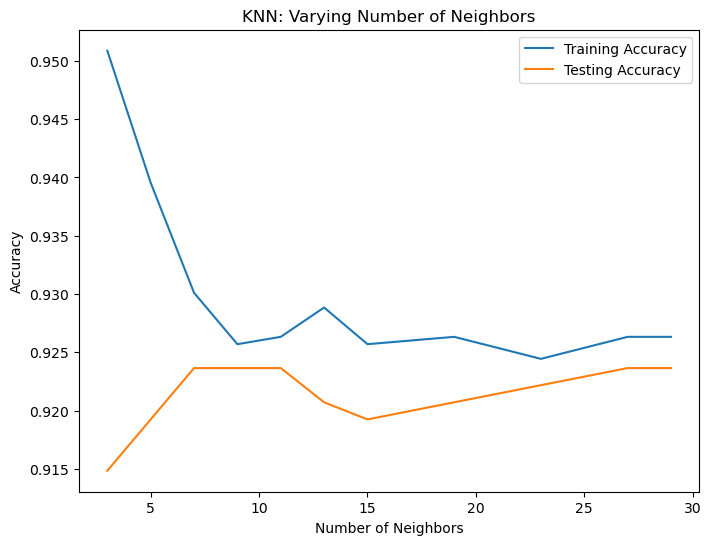

In [40]:
plt.figure(figsize=(8, 6)) 
plt.title("KNN: Varying Number of Neighbors") 
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy") 
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy") 
plt.legend() 
plt.xlabel("Number of Neighbors") 
plt.ylabel("Accuracy") 
plt.show() 

In [41]:
print(test_accuracies)

{3: 0.9148311306901615, 5: 0.9192364170337739, 7: 0.9236417033773862, 9: 0.9236417033773862, 11: 0.9236417033773862, 13: 0.920704845814978, 15: 0.9192364170337739, 19: 0.920704845814978, 23: 0.922173274596182, 27: 0.9236417033773862, 29: 0.9236417033773862}


based on the results , k=9 11 or 29 give the best and almost same result
### so we will take k=9

In [42]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

In [45]:
X_imputed =df.drop(["pool","parking","vue_panoramique","jardin","climatisation","chauffage_central","ascenseur"],axis=1).values[2269:,:]
X_imputed.shape


(3045, 5)

In [46]:
y_pred=knn.predict(X_imputed)

In [47]:
df.loc[df['pool'].isna(), 'pool'] = y_pred

In [48]:
df.to_csv("../../data/raw/merged.csv")